# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\vinor\Sourcing open data in Phython Task6.1'

In [4]:
# Import data
df_kc_house = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.pkl'))

In [5]:
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              21613 non-null  int64         
 1   Date            21613 non-null  datetime64[ns]
 2   Price           21613 non-null  float64       
 3   Bedrooms        21613 non-null  int64         
 4   Bathrooms       21613 non-null  int64         
 5   Sqft_living     21613 non-null  int64         
 6   Sqft_lot        21613 non-null  int64         
 7   Floors          21613 non-null  int64         
 8   Waterfront      21613 non-null  int64         
 9   View            21613 non-null  int64         
 10  Condition       21613 non-null  int64         
 11  Grade           21613 non-null  int64         
 12  Sqft_Above      21613 non-null  int64         
 13  Sqft_Basement   21613 non-null  int64         
 14  Year_Built      21613 non-null  datetime64[ns]
 15  Ye

In [6]:
#Assigning the new dataset after removing 4 columns in df_kc_house_corrl_data.
df_kc_house=df_kc_house.drop(columns = ['Id','Date','Year_Built','Year_Renovated'])

In [7]:
df_kc_house.shape

(21613, 15)

###  Already my data is cleaned, no missing & duplicates found. checked for mixed type & variable datatype. 

In [8]:
df_kc_house.head()

,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Zipcode,Latitude,Longitude
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045


# The Elbow Technique

In [9]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_kc_house).score(df_kc_house) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [11]:
score

[-2950032925055789.5,
 -1391578485602598.0,
 -767154495422179.0,
 -497550522540097.06,
 -360918551122087.25,
 -274218000054894.47,
 -215799511860320.75,
 -172406434604050.25,
 -146874386131704.53,
 -124053953637291.66,
 -109204987951117.36,
 -95830290784846.61,
 -85907647696414.81,
 -75887102185157.67,
 -69146952536185.39,
 -63155949282824.85,
 -58036275293388.95,
 -52759602831511.09,
 -48375516105117.336]

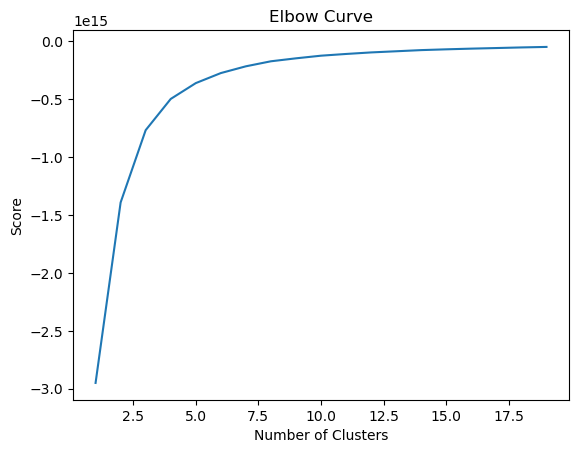

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  there's a large jump from 1 to 2.5 and 2.5 to 4 and 4 to 5 the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is 4.

## # Create the k-means object.

In [13]:


kmeans = KMeans(n_clusters = 4) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_kc_house)

C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [15]:
df_kc_house['clusters'] = kmeans.fit_predict(df_kc_house)

C:\Users\vinor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df_kc_house.head()

,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Zipcode,Latitude,Longitude,clusters
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,0
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,1
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,0
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1


In [17]:
df_kc_house['clusters'].value_counts()

clusters
1    12938
0     7256
3     1229
2      190
Name: count, dtype: int64

In [18]:
df_kc_house.to_csv(os.path.join(path, '02 Data','Prepared Data', 'kc_house_data_cluster.csv'))

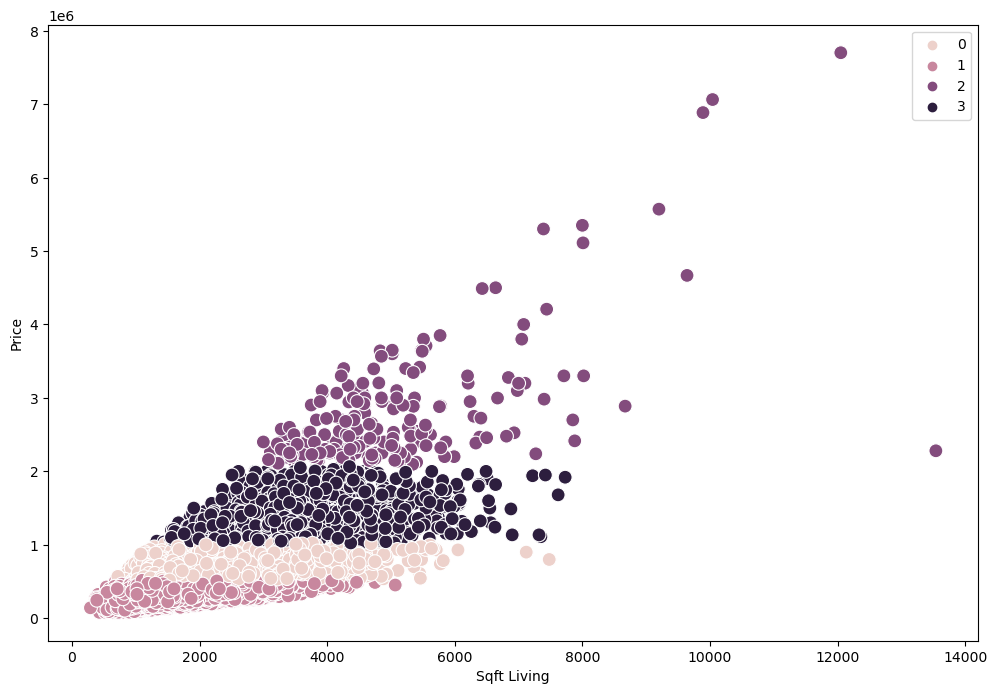

In [19]:
# Plot the clusters for the "Price" and "Sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kc_house['Sqft_living'], y=df_kc_house['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sqft Living') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

####  High price range are in 3rd cluster that is Purple, 1st and 2nd are low price clusters which are light and dark purple color, 4th cluster is group of middle price range . If living Sqft area increases the price also increases.

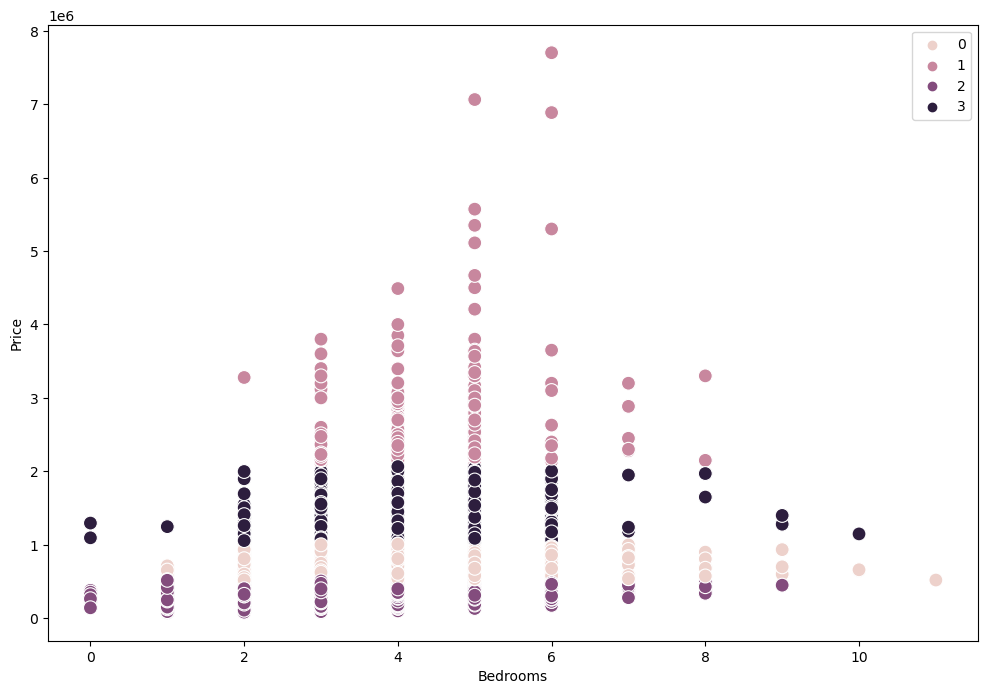

In [99]:
# Plot the clusters for the "Price" and "Bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kc_house['Bedrooms'], y=df_kc_house['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [100]:
## High price range are in 3rd cluster that is Purple, 1st and 2nd are low price clusters which are light and dark purple color, 
## 4th cluster is group of middle price range.5 & 6 no of bedrooms are in high price and sold more compare to others.
## No of bedrooms increase the price value decreases.


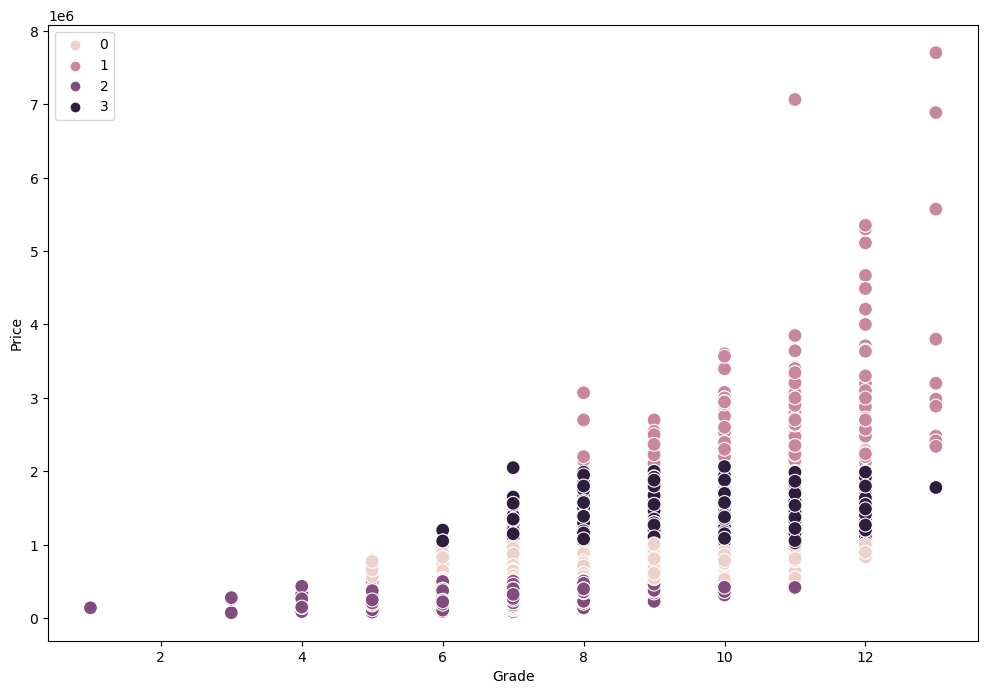

In [101]:
# Plot the clusters for the "Price" and "Grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kc_house['Grade'], y=df_kc_house['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Grade') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [102]:
## High price range are in 3rd cluster that is Purple, 1st and 2nd are low price clusters which are light and dark purple color,
## 4th cluster is group of middle price range. there is strong relationship between grade and price value. If the grade is high
## price value also high.Higher grade houses are sold more.


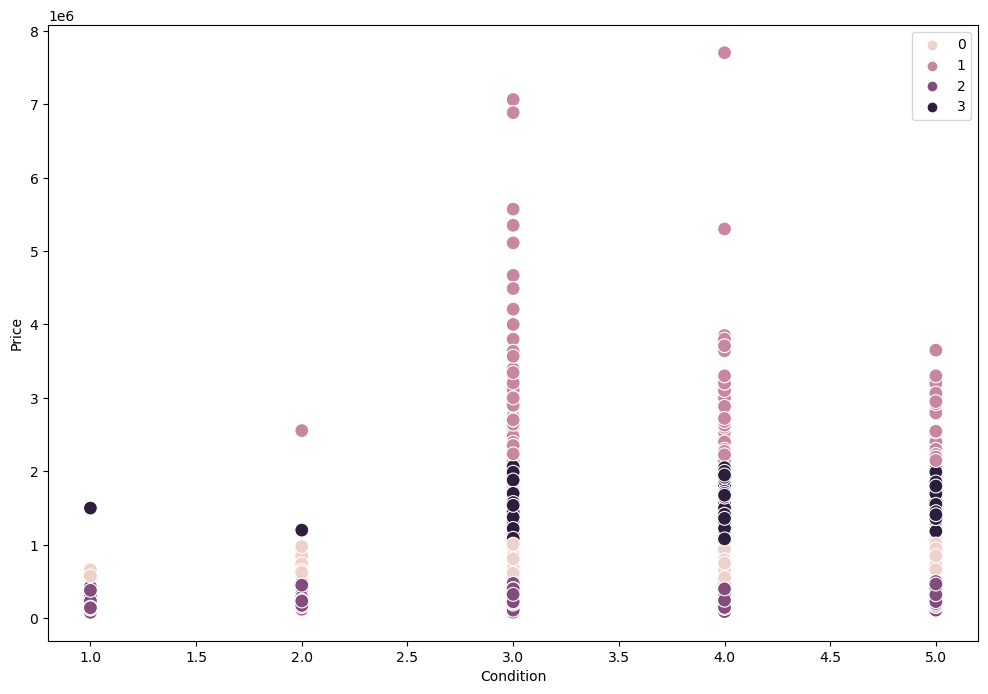

In [103]:
# Plot the clusters for the "Price" and "Condition" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kc_house['Condition'], y=df_kc_house['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Condition') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [104]:
## 0 & 1 are low range, 2 is upper range, 3 is middle range.3,4 &5  condition houses are more in sale & price is also high.

In [105]:
df_kc_house.loc[df_kc_house['clusters'] == 3, 'cluster'] = 'dark purple'
df_kc_house.loc[df_kc_house['clusters'] == 2, 'cluster'] = 'purple'
df_kc_house.loc[df_kc_house['clusters'] == 1, 'cluster'] = 'pink'
df_kc_house.loc[df_kc_house['clusters'] == 0, 'cluster'] = 'light purple'

### Descriptive statistics for the clusters using the groupby() function

In [106]:
df_kc_house.groupby('cluster').agg({'Sqft_living':['mean', 'median'],'Bedrooms':['mean','median'],
                                    'Grade':['mean','median'],'Condition':['mean','median'],
                          'Price':['mean', 'median']})

Sqft_living          Bedrooms             Grade         \
                     mean  median      mean median       mean median   
cluster                                                                
dark purple   3632.033360  3530.0  4.031733    4.0   9.637103   10.0   
light purple  2455.921350  2400.0  3.608127    4.0   8.187879    8.0   
pink          5094.152632  4730.0  4.352632    4.0  10.752632   11.0   
purple        1677.070203  1600.0  3.158110    3.0   7.125174    7.0   

             Condition                Price             
                  mean median          mean     median  
cluster                                                 
dark purple   3.466233    3.0  1.358833e+06  1295000.0  
light purple  3.442975    3.0  6.893052e+05   660000.0  
pink          3.505263    3.0  2.806109e+06  2528500.0  
purple        3.383795    3.0  3.452453e+05   345000.0

In [107]:
## The pink cluster has the best stats in almost all category. The median Sqft_living around this type of property is 4730,
## which is significantly larger than the other three. The median Bedrooms is 4 which is same for 3 clusters & high compare to remaining one.
## The median Grade is 11 which is high & the median condition is 3 for all clusters.


In [108]:
## Understanding the characteristics of each cluster provide insights into the dynamics of the housing market. 
## Differences in average price,condition,grade,Bedrooms,Sqft_living among clusters could indicate different market segments 
## with varying levels of demand and supply.